In [1]:
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import re
import pickle
import csv
import pandas as pd
from pandas import DataFrame 
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import config
import sys
import jsonpickle
 

In [2]:
twt_alevie = pd.read_csv('..//db//twt_alevie.csv')
twt_alevie

,dates,ID,content,rt,like
0,2024년 2월 27일,Aaron Levie@levie,"For context, Netflix could ship you their enti...",69,434
1,2024년 2월 26일,Aaron Levie@levie,Startups tend to win in spaces where the incum...,165,894
2,2024년 2월 25일,Aaron Levie@levie,People’s understanding of business is funny. B...,30,251
3,2024년 2월 25일,Aaron Levie@levie,How could you passionately hate people this much.,71,607
4,2024년 2월 24일,Aaron Levie@levie,We’re beta testing an AI feature internally at...,39,232
...,...,...,...,...,...
252,2022년 3월 16일,Aaron Levie@levie,Welcome to the new economy,8,108
253,2022년 3월 13일,Aaron Levie@levie,I’m a single issue voter: time should not just...,76,1.2천
254,2022년 3월 11일,Aaron Levie@levie,There are few joys in life like playing with f...,19,250
255,2022년 3월 10일,Aaron Levie@levie,https://finance.yahoo.com/news/mast-j-germe...,1,36


In [3]:
twt_list = twt_alevie['content'].values 

In [4]:
twt_list = twt_list.tolist()
twt_list

['For context, Netflix could ship you their entire film catalog on a single disc.',
 'Startups tend to win in spaces where the incumbent cannot respond effectively due to organizational, business model, or brand reasons. Perhaps the fact that AI has a long tail of brand risks and organizational dilemmas in resolving them, we’ll see more startup-led disruption.',
 'People’s understanding of business is funny. Being *unprofitable* is a far faster way to have a site run into the ground.',
 'How could you passionately hate people this much.',
 'We’re beta testing an AI feature internally at Box that was a concept we brainstormed about 5 years ago that would have been literally impossible to pull off back then. Pretty remarkable to see what’s now possible to solve with AI.',
 'The main job of a founder is taking an offhand comment made in a meeting for 7 seconds and pivoting the whole business model around it.',
 'This demo is insane. Try it: http://retellai.com',
 'Given the incentives the

In [5]:
twt_list = list(map(str,twt_list)) # 리스트 원소들 문자열로 변환
twt_list

['For context, Netflix could ship you their entire film catalog on a single disc.',
 'Startups tend to win in spaces where the incumbent cannot respond effectively due to organizational, business model, or brand reasons. Perhaps the fact that AI has a long tail of brand risks and organizational dilemmas in resolving them, we’ll see more startup-led disruption.',
 'People’s understanding of business is funny. Being *unprofitable* is a far faster way to have a site run into the ground.',
 'How could you passionately hate people this much.',
 'We’re beta testing an AI feature internally at Box that was a concept we brainstormed about 5 years ago that would have been literally impossible to pull off back then. Pretty remarkable to see what’s now possible to solve with AI.',
 'The main job of a founder is taking an offhand comment made in a meeting for 7 seconds and pivoting the whole business model around it.',
 'This demo is insane. Try it: http://retellai.com',
 'Given the incentives the

In [6]:
tk_list = []
for sentence in twt_list:
    tk_list.append(word_tokenize(sentence))
 
tk_list # 트윗 별 토큰화된 단어

[['For',
  'context',
  ',',
  'Netflix',
  'could',
  'ship',
  'you',
  'their',
  'entire',
  'film',
  'catalog',
  'on',
  'a',
  'single',
  'disc',
  '.'],
 ['Startups',
  'tend',
  'to',
  'win',
  'in',
  'spaces',
  'where',
  'the',
  'incumbent',
  'can',
  'not',
  'respond',
  'effectively',
  'due',
  'to',
  'organizational',
  ',',
  'business',
  'model',
  ',',
  'or',
  'brand',
  'reasons',
  '.',
  'Perhaps',
  'the',
  'fact',
  'that',
  'AI',
  'has',
  'a',
  'long',
  'tail',
  'of',
  'brand',
  'risks',
  'and',
  'organizational',
  'dilemmas',
  'in',
  'resolving',
  'them',
  ',',
  'we',
  '’',
  'll',
  'see',
  'more',
  'startup-led',
  'disruption',
  '.'],
 ['People',
  '’',
  's',
  'understanding',
  'of',
  'business',
  'is',
  'funny',
  '.',
  'Being',
  '*',
  'unprofitable',
  '*',
  'is',
  'a',
  'far',
  'faster',
  'way',
  'to',
  'have',
  'a',
  'site',
  'run',
  'into',
  'the',
  'ground',
  '.'],
 ['How',
  'could',
  'you',
  '

In [7]:
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words())
result_list = []

for tk_list_list in tk_list: # [[]] to []
    result = [] 
    for word in tk_list_list: # list to word arg
        
        if (word not in stop_words) and (word not in string.punctuation) and (word not in ('’')) and (word not in ('“')) and (word not in ('”')):   
            word = word.lower()
            result.append(word)
    result_list.append(result)
print(result_list) # 불용어(스탑워드) 제거

[['for', 'context', 'netflix', 'ship', 'entire', 'film', 'catalog', 'single', 'disc'], ['startups', 'tend', 'win', 'spaces', 'incumbent', 'respond', 'effectively', 'due', 'organizational', 'business', 'model', 'brand', 'reasons', 'perhaps', 'fact', 'ai', 'long', 'tail', 'brand', 'risks', 'organizational', 'dilemmas', 'resolving', 'startup-led', 'disruption'], ['people', 'understanding', 'business', 'funny', 'being', 'unprofitable', 'faster', 'site', 'run', 'ground'], ['how', 'passionately', 'hate'], ['we', 'beta', 'testing', 'ai', 'feature', 'internally', 'box', 'concept', 'brainstormed', '5', 'years', 'ago', 'literally', 'impossible', 'pull', 'back', 'pretty', 'remarkable', 'possible', 'solve', 'ai'], ['the', 'job', 'founder', 'taking', 'offhand', 'comment', 'made', 'meeting', '7', 'seconds', 'pivoting', 'business', 'model'], ['this', 'demo', 'insane', 'try', 'http', '//retellai.com'], ['given', 'incentives', 'public', 'cloud', 'providers', 'bring', 'workloads', 'possible', 'inevitabl

In [8]:
from nltk.corpus import wordnet
from collections import defaultdict

def assign_category(word):
    try:
        categories = ['business', 'company', 'emotion', 'social', 'technology', 'general', 'product', 'politics', 'environment', 'innovation']
        max_similarity = -1  # 초기값 설정
        assigned_category = None
        
        for category in categories:
            synsets = wordnet.synsets(category)
            for synset in synsets:
                similarity = synset.path_similarity(wordnet.synsets(word)[0]) if wordnet.synsets(word) else None
                if similarity and similarity > max_similarity:
                    max_similarity = similarity
                    assigned_category = category
        return assigned_category
    except IndexError:
        return None

def assign_categories_to_sentence(sentence_tokens):
    category_counts = defaultdict(int)
    
    for word in sentence_tokens:
        category = assign_category(word)
        if category:
            category_counts[category] += 1
    
    if category_counts:
        # 가장 많이 할당된 카테고리 반환
        assigned_category = max(category_counts, key=category_counts.get)
        return assigned_category, category_counts[assigned_category]
    else:
        return None

# 테스트
sentence_tokens = ['for', 'context', 'netflix', 'ship', 'entire', 'film', 'catalog', 'single', 'disc']
assigned_category = assign_categories_to_sentence(sentence_tokens)
print(f"입력된 문장의 토큰 '{sentence_tokens}'에 대한 연관성이 가장 높은 카테고리: {assigned_category}")


입력된 문장의 토큰 '['for', 'context', 'netflix', 'ship', 'entire', 'film', 'catalog', 'single', 'disc']'에 대한 연관성이 가장 높은 카테고리: ('product', 4)


In [10]:
# 토큰화된 단어와 주제 연결
topic_conv_list=[]
for sentence in result_list:
    assigned_category = assign_categories_to_sentence(sentence)
    if assigned_category != None:
        topic_conv_list.append({'word' : sentence, 'topic' : assigned_category[0]})
topic_conv_list

[{'word': ['for',
   'context',
   'netflix',
   'ship',
   'entire',
   'film',
   'catalog',
   'single',
   'disc'],
  'topic': 'product'},
 {'word': ['startups',
   'tend',
   'win',
   'spaces',
   'incumbent',
   'respond',
   'effectively',
   'due',
   'organizational',
   'business',
   'model',
   'brand',
   'reasons',
   'perhaps',
   'fact',
   'ai',
   'long',
   'tail',
   'brand',
   'risks',
   'organizational',
   'dilemmas',
   'resolving',
   'startup-led',
   'disruption'],
  'topic': 'social'},
 {'word': ['people',
   'understanding',
   'business',
   'funny',
   'being',
   'unprofitable',
   'faster',
   'site',
   'run',
   'ground'],
  'topic': 'business'},
 {'word': ['how', 'passionately', 'hate'], 'topic': 'social'},
 {'word': ['we',
   'beta',
   'testing',
   'ai',
   'feature',
   'internally',
   'box',
   'concept',
   'brainstormed',
   '5',
   'years',
   'ago',
   'literally',
   'impossible',
   'pull',
   'back',
   'pretty',
   'remarkable',
   '

In [11]:
# 트윗의 카테고리 카운트
topic_conv_list = pd.DataFrame(topic_conv_list)
df = topic_conv_list['topic'].value_counts()
df

topic
business       100
social          88
product         23
company         20
emotion          8
environment      5
politics         4
general          3
innovation       1
technology       1
Name: count, dtype: int64

In [12]:
df.values.tolist()

[100, 88, 23, 20, 8, 5, 4, 3, 1, 1]

In [13]:
df.index.tolist()

['business',
 'social',
 'product',
 'company',
 'emotion',
 'environment',
 'politics',
 'general',
 'innovation',
 'technology']

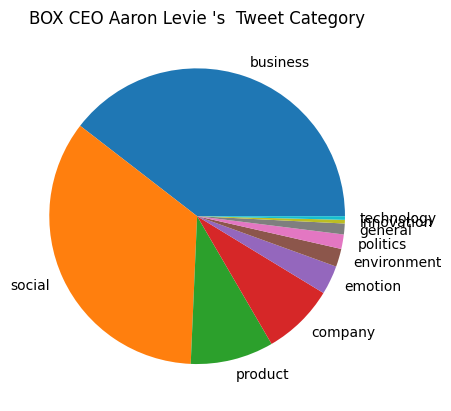

In [14]:
import matplotlib.pyplot as plt

plt.pie(df.values.tolist(),labels=df.index.tolist() )
plt.title("BOX CEO Aaron Levie 's  Tweet Category")
plt.show()

감성분석

In [15]:
from nltk import sent_tokenize, word_tokenize
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem.porter import *
from wordcloud import WordCloud, STOPWORDS

from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import config
import sys
import jsonpickle
import os
plt.style.use('fivethirtyeight')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\mit16\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\mit16\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\mit16\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\mit16\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\mit16\AppData\Roaming\nltk_data...
[nltk_data]    | 

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()

In [17]:
from textblob import TextBlob


twt_df_copy = twt_alevie.copy()
twt_df_copy['content'] = twt_df_copy['content'].astype(str)

# Create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
twt_df_copy['Subjectivity'] = twt_df_copy['content'].apply(getSubjectivity)
twt_df_copy['Polarity'] = twt_df_copy['content'].apply(getPolarity)

# Compute negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 0 # NEGATIVE
    elif score == 0:
        return 1 # NEUTRAL
    else:
        return 2 # POSITIVE
    
twt_df_copy['Analysis'] = twt_df_copy['Polarity'].apply(getAnalysis)

twt_df_copy.head()

,dates,ID,content,rt,like,Subjectivity,Polarity,Analysis
0,2024년 2월 27일,Aaron Levie@levie,"For context, Netflix could ship you their enti...",69,434,0.419643,-0.035714,0
1,2024년 2월 26일,Aaron Levie@levie,Startups tend to win in spaces where the incum...,165,894,0.418750,0.281250,2
2,2024년 2월 25일,Aaron Levie@levie,People’s understanding of business is funny. B...,30,251,1.000000,0.175000,2
3,2024년 2월 25일,Aaron Levie@levie,How could you passionately hate people this much.,71,607,0.550000,-0.300000,0
4,2024년 2월 24일,Aaron Levie@levie,We’re beta testing an AI feature internally at...,39,232,0.625000,0.055556,2


In [37]:
twt_df_copy['Analysis'].value_counts()

Analysis
2    138
1     73
0     46
Name: count, dtype: int64

In [44]:
twt_df_copy['Analysis'].value_counts().values.tolist()

[138, 73, 46]

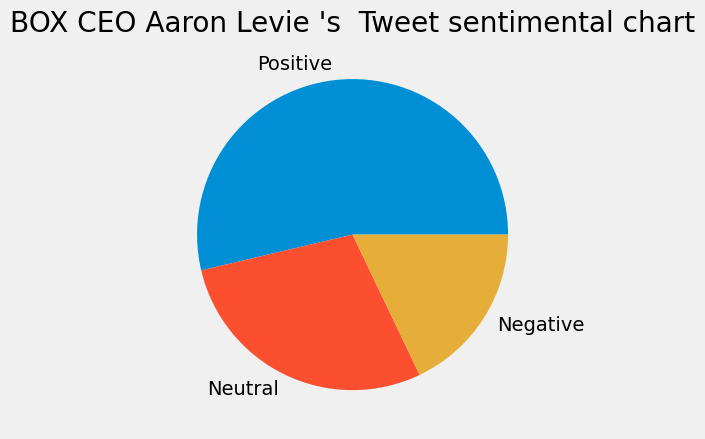

In [48]:
plt.pie(twt_df_copy['Analysis'].value_counts().values.tolist(), labels=['Positive', 'Neutral', 'Negative'])
plt.title("BOX CEO Aaron Levie 's  Tweet sentimental chart")
plt.show()

딥러닝 BERT

In [19]:
입력요소
트윗의 주제, subjectivity(주관성점수; 의견이 주관적인 생각인지 객관적인 내용인지), 감성지수, 리트윗수, 좋아요수

출력할 예측요소
양수
음수
전날 음수값 대비 절대값 작은경우 ( 감소폭이 줄어들었을때)
전날 음수값 대비 절대값 큰 경우
전날 양수값 대비 작은경우
전날 양수값 대비 큰 경우

lstm



SyntaxError: invalid syntax (4028310026.py, line 2)